<a href="https://colab.research.google.com/github/aayushh04/dlt/blob/main/week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Activation functions and derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # stability trick
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, 1e-12, 1. - 1e-12)
    log_likelihood = -np.log(y_pred[range(n_samples), y_true])
    loss = np.sum(log_likelihood) / n_samples
    return loss

# One-hot encode labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Neural network class
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.lr = learning_rate

    def forward(self, X):
        # Forward propagation
        self.Z1 = X.dot(self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = self.A1.dot(self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def backward(self, X, y_true):
        n_samples = X.shape[0]
        y_one_hot = one_hot_encode(y_true, self.b2.shape[1])

        # Output layer error
        dZ2 = self.A2 - y_one_hot  # shape: (n_samples, output_size)

        # Gradients for W2 and b2
        dW2 = (self.A1.T).dot(dZ2) / n_samples
        db2 = np.sum(dZ2, axis=0, keepdims=True) / n_samples

        # Backpropagate into hidden layer
        dA1 = dZ2.dot(self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)

        # Gradients for W1 and b1
        dW1 = (X.T).dot(dZ1) / n_samples
        db1 = np.sum(dZ1, axis=0, keepdims=True) / n_samples

        # Update weights and biases
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = cross_entropy_loss(y, y_pred)
            self.backward(X, y)

            if (epoch + 1) % 100 == 0 or epoch == 0:
                print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}")

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)


# Example usage:

# XOR problem (toy data for classification)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0, 1, 1, 0])  # labels

# Initialize and train the network
nn = SimpleNeuralNetwork(input_size=2, hidden_size=5, output_size=2, learning_rate=0.1)
nn.train(X, y, epochs=1000)

# Predictions
predictions = nn.predict(X)
print("Predictions:", predictions)
print("True labels:", y)


Epoch 1/1000 - Loss: 0.6932
Epoch 100/1000 - Loss: 0.6930
Epoch 200/1000 - Loss: 0.6920
Epoch 300/1000 - Loss: 0.6831
Epoch 400/1000 - Loss: 0.6171
Epoch 500/1000 - Loss: 0.4633
Epoch 600/1000 - Loss: 0.3922
Epoch 700/1000 - Loss: 0.3647
Epoch 800/1000 - Loss: 0.2865
Epoch 900/1000 - Loss: 0.1392
Epoch 1000/1000 - Loss: 0.0767
Predictions: [0 1 1 0]
True labels: [0 1 1 0]


Epoch 1/1000 - Loss: 0.6931 - Accuracy: 75.00%
Epoch 100/1000 - Loss: 0.6927 - Accuracy: 100.00%
Epoch 200/1000 - Loss: 0.6883 - Accuracy: 100.00%
Epoch 300/1000 - Loss: 0.6422 - Accuracy: 100.00%
Epoch 400/1000 - Loss: 0.4009 - Accuracy: 100.00%
Epoch 500/1000 - Loss: 0.1598 - Accuracy: 100.00%
Epoch 600/1000 - Loss: 0.0779 - Accuracy: 100.00%
Epoch 700/1000 - Loss: 0.0475 - Accuracy: 100.00%
Epoch 800/1000 - Loss: 0.0330 - Accuracy: 100.00%
Epoch 900/1000 - Loss: 0.0251 - Accuracy: 100.00%
Epoch 1000/1000 - Loss: 0.0200 - Accuracy: 100.00%


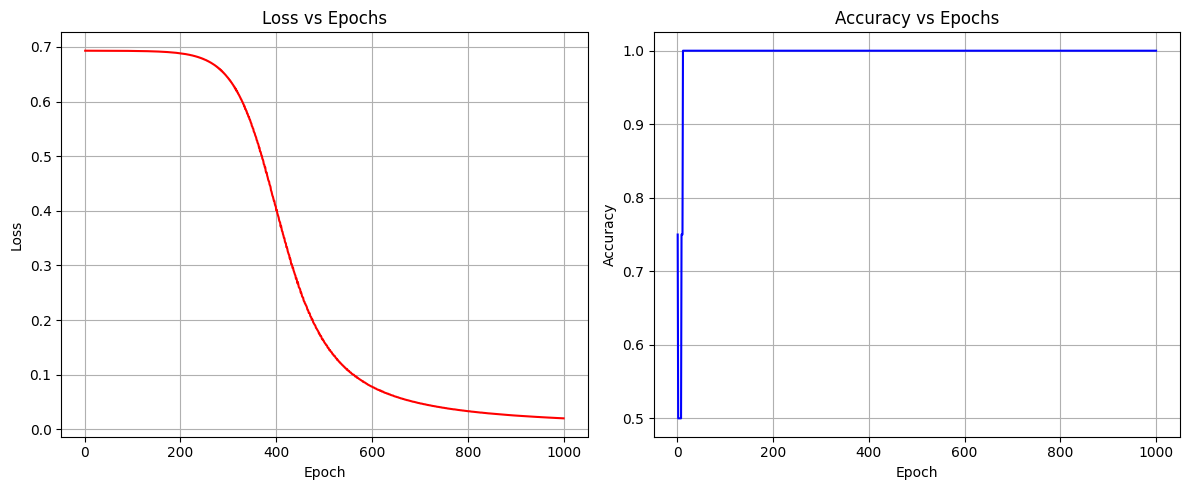

Predictions: [0 1 1 0]
True labels: [0 1 1 0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions and derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # stability trick
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    y_pred = np.clip(y_pred, 1e-12, 1. - 1e-12)
    log_likelihood = -np.log(y_pred[range(n_samples), y_true])
    loss = np.sum(log_likelihood) / n_samples
    return loss

# One-hot encode labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Accuracy function
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Neural network class
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.lr = learning_rate

    def forward(self, X):
        self.Z1 = X.dot(self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = self.A1.dot(self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def backward(self, X, y_true):
        n_samples = X.shape[0]
        y_one_hot = one_hot_encode(y_true, self.b2.shape[1])
        dZ2 = self.A2 - y_one_hot
        dW2 = (self.A1.T).dot(dZ2) / n_samples
        db2 = np.sum(dZ2, axis=0, keepdims=True) / n_samples
        dA1 = dZ2.dot(self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = (X.T).dot(dZ1) / n_samples
        db1 = np.sum(dZ1, axis=0, keepdims=True) / n_samples
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=1000):
        losses = []
        accuracies = []
        for epoch in range(epochs):
            y_pred_prob = self.forward(X)
            loss = cross_entropy_loss(y, y_pred_prob)
            y_pred = np.argmax(y_pred_prob, axis=1)
            acc = accuracy_score(y, y_pred)
            losses.append(loss)
            accuracies.append(acc)
            self.backward(X, y)

            if (epoch + 1) % 100 == 0 or epoch == 0:
                print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f} - Accuracy: {acc*100:.2f}%")

        # Plot accuracy and loss
        plt.figure(figsize=(12,5))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, epochs+1), losses, label='Loss', color='red')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss vs Epochs')
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(range(1, epochs+1), accuracies, label='Accuracy', color='blue')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs Epochs')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        y_pred_prob = self.forward(X)
        return np.argmax(y_pred_prob, axis=1)


# Example usage:

# XOR problem data
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0, 1, 1, 0])

# Initialize and train the network
nn = SimpleNeuralNetwork(input_size=2, hidden_size=5, output_size=2, learning_rate=0.1)
nn.train(X, y, epochs=1000)

# Predictions
predictions = nn.predict(X)
print("Predictions:", predictions)
print("True labels:", y)
